In [4]:
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input

In [5]:
df_train = pd.read_csv('./dataset/ch6-2_train.csv')
df_test = pd.read_csv('./dataset/ch6-2_test.csv')

x_train = df_train.iloc[:, 0:3].values
y_train = df_train.iloc[:, 3].values

x_test = df_test.iloc[:, 0:3].values
y_test = df_test.iloc[:, 3].values

In [7]:
df_train

,wing_length,tail_length,comb_height,breeds
0,238,63,34,a
1,236,67,30,a
2,256,65,34,a
3,240,63,35,a
4,246,65,30,a
...,...,...,...,...
235,253,72,34,c
236,236,74,32,c
237,230,74,33,c
238,237,72,32,c


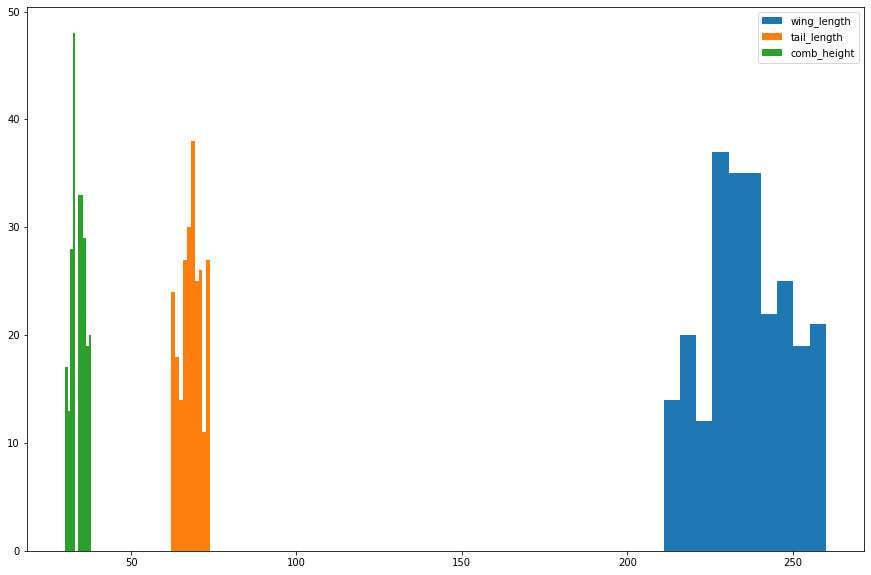

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 10))
plt.hist(df_train.wing_length, label='wing_length')
plt.hist(df_train.tail_length, label='tail_length')
plt.hist(df_train.comb_height, label='comb_height')
plt.legend()
plt.show()

    - 3가지 변수 모두 데이터의 중심이 좌측이나 우측으로 치우치지 않고, 주로 가운데 모여있음
    => 이런 경우 Min-Max Scaler (최고값 :0, 최대값 :1)
    - 데이터 중심이 한쪽에 치우친 형태라면 Standard 또는 Robust Scaler 사용
    => 스케일된 데이터의 중심이 가운데로 향하게 바꿔주는 것이 모델의 성능 향상에 유리함
    

- 전처리 (scaling, onehotencoding)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_x_scaled = scaler.fit_transform(x_train)
test_x_scaled = scaler.transform(x_test)

In [12]:
print(f'Min : {train_x_scaled.min()}\nMax : {train_x_scaled.max()}')

Min : 0.0
Max : 1.0


    - 레이블 변환 함수
        1. LabelEncoder() : 문자 -> 정수 변환
        2. OneHotEncoder() : 정수를 2진수로 변환
        3. LabelBinarizer() : 문자를 2진수로 변환

In [14]:
y_train[0:5]

from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer().fit(y_train)
train_y_one = lb.transform(y_train)
test_y_one = lb.transform(y_test)

train_y_one[:10]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [18]:
model = Sequential()
model.add(Input(3))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                64        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 707
Trainable params: 707
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

history = model.fit(train_x_scaled, train_y_one, epochs=300, batch_size=16, validation_split=0.2)

Epoch 1/300


2022-07-18 20:13:57.309450: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-18 20:13:57.429963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 2s 13ms/step - loss: 1.0995 - accuracy: 0.1823 - val_loss: 0.9623 - val_accuracy: 1.0000
Epoch 2/300
12/12 [==============================] - 0s 7ms/step - loss: 1.0512 - accuracy: 0.4010 - val_loss: 1.0318 - val_accuracy: 0.5833
Epoch 3/300
 9/12 [=====================>........] - ETA: 0s - loss: 1.0120 - accuracy: 0.7431

2022-07-18 20:13:59.357447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 0s 8ms/step - loss: 1.0074 - accuracy: 0.7552 - val_loss: 1.1055 - val_accuracy: 0.0000e+00
Epoch 4/300
12/12 [==============================] - 0s 7ms/step - loss: 0.9607 - accuracy: 0.8125 - val_loss: 1.1670 - val_accuracy: 0.0000e+00
Epoch 5/300
12/12 [==============================] - 0s 8ms/step - loss: 0.9116 - accuracy: 0.8125 - val_loss: 1.2234 - val_accuracy: 0.0000e+00
Epoch 6/300
12/12 [==============================] - 0s 7ms/step - loss: 0.8583 - accuracy: 0.8125 - val_loss: 1.2707 - val_accuracy: 0.0000e+00
Epoch 7/300
12/12 [==============================] - 0s 8ms/step - loss: 0.8037 - accuracy: 0.8177 - val_loss: 1.3292 - val_accuracy: 0.0000e+00
Epoch 8/300
12/12 [==============================] - 0s 8ms/step - loss: 0.7453 - accuracy: 0.8177 - val_loss: 1.3301 - val_accuracy: 0.0000e+00
Epoch 9/300
12/12 [==============================] - 0s 7ms/step - loss: 0.6908 - accuracy: 0.8125 - val_loss: 1.3522 - val_accuracy: 0.0000e+

12/12 [==============================] - 0s 7ms/step - loss: 0.1873 - accuracy: 0.9271 - val_loss: 0.4132 - val_accuracy: 0.8333
Epoch 61/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1879 - accuracy: 0.9323 - val_loss: 0.4262 - val_accuracy: 0.8333
Epoch 62/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1853 - accuracy: 0.9271 - val_loss: 0.4150 - val_accuracy: 0.8333
Epoch 63/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1838 - accuracy: 0.9323 - val_loss: 0.4383 - val_accuracy: 0.7708
Epoch 64/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1835 - accuracy: 0.9323 - val_loss: 0.3847 - val_accuracy: 0.8333
Epoch 65/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1797 - accuracy: 0.9323 - val_loss: 0.3971 - val_accuracy: 0.8125
Epoch 66/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1781 - accuracy: 0.9427 - val_loss: 0.4045 - val_accuracy: 0.8125
Epoch 67/300
12/12 

12/12 [==============================] - 0s 7ms/step - loss: 0.1430 - accuracy: 0.9479 - val_loss: 0.2442 - val_accuracy: 0.9167
Epoch 118/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1404 - accuracy: 0.9479 - val_loss: 0.3171 - val_accuracy: 0.8750
Epoch 119/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1410 - accuracy: 0.9531 - val_loss: 0.2699 - val_accuracy: 0.8958
Epoch 120/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1387 - accuracy: 0.9531 - val_loss: 0.2809 - val_accuracy: 0.8958
Epoch 121/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1421 - accuracy: 0.9479 - val_loss: 0.3158 - val_accuracy: 0.8750
Epoch 122/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9531 - val_loss: 0.2697 - val_accuracy: 0.9167
Epoch 123/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1387 - accuracy: 0.9531 - val_loss: 0.2671 - val_accuracy: 0.8958
Epoch 124/300

12/12 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9583 - val_loss: 0.2584 - val_accuracy: 0.9167
Epoch 175/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1273 - accuracy: 0.9531 - val_loss: 0.2612 - val_accuracy: 0.9167
Epoch 176/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1267 - accuracy: 0.9583 - val_loss: 0.2717 - val_accuracy: 0.9167
Epoch 177/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1285 - accuracy: 0.9583 - val_loss: 0.2676 - val_accuracy: 0.9167
Epoch 178/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9531 - val_loss: 0.2580 - val_accuracy: 0.9167
Epoch 179/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1264 - accuracy: 0.9531 - val_loss: 0.2615 - val_accuracy: 0.9167
Epoch 180/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9583 - val_loss: 0.2739 - val_accuracy: 0.9167
Epoch 181/300

12/12 [==============================] - 0s 7ms/step - loss: 0.1228 - accuracy: 0.9531 - val_loss: 0.2653 - val_accuracy: 0.9375
Epoch 232/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1317 - accuracy: 0.9427 - val_loss: 0.3127 - val_accuracy: 0.8958
Epoch 233/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1261 - accuracy: 0.9531 - val_loss: 0.2184 - val_accuracy: 0.9375
Epoch 234/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1250 - accuracy: 0.9531 - val_loss: 0.2529 - val_accuracy: 0.9375
Epoch 235/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1236 - accuracy: 0.9531 - val_loss: 0.2695 - val_accuracy: 0.9375
Epoch 236/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1234 - accuracy: 0.9583 - val_loss: 0.2756 - val_accuracy: 0.9375
Epoch 237/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1279 - accuracy: 0.9479 - val_loss: 0.2407 - val_accuracy: 0.9375
Epoch 238/300

12/12 [==============================] - 0s 7ms/step - loss: 0.1240 - accuracy: 0.9531 - val_loss: 0.2763 - val_accuracy: 0.9375
Epoch 289/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1220 - accuracy: 0.9531 - val_loss: 0.2626 - val_accuracy: 0.9375
Epoch 290/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1230 - accuracy: 0.9583 - val_loss: 0.2409 - val_accuracy: 0.9375
Epoch 291/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1206 - accuracy: 0.9531 - val_loss: 0.2828 - val_accuracy: 0.9375
Epoch 292/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1210 - accuracy: 0.9531 - val_loss: 0.2628 - val_accuracy: 0.9375
Epoch 293/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.9531 - val_loss: 0.2529 - val_accuracy: 0.9375
Epoch 294/300
12/12 [==============================] - 0s 7ms/step - loss: 0.1203 - accuracy: 0.9583 - val_loss: 0.2757 - val_accuracy: 0.9375
Epoch 295/300

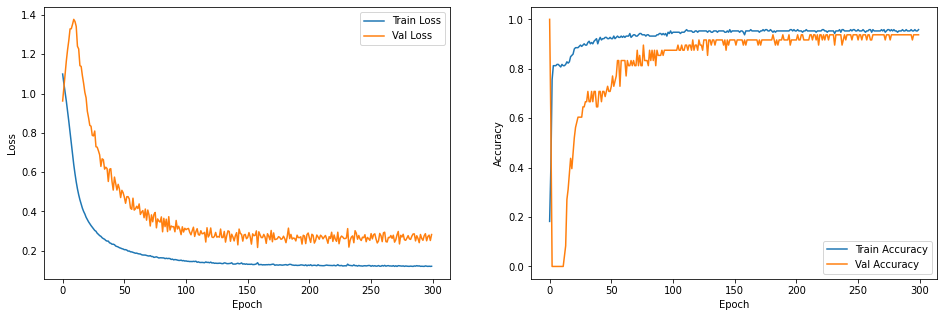

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()

In [35]:
print(f'Train Evaluation : {model.evaluate(train_x_scaled, train_y_one)}')

print(f'Test Evaluation : {model.evaluate(test_x_scaled, test_y_one)}')

8/8 [==============================] - 0s 7ms/step - loss: 0.1516 - accuracy: 0.9542
Train Evaluation : [0.15158674120903015, 0.9541667103767395]
2/2 [==============================] - 0s 6ms/step - loss: 0.2983 - accuracy: 0.9500
Test Evaluation : [0.29825523495674133, 0.9500000476837158]


In [36]:
y_pred = model.predict(test_x_scaled)

y_pred = y_pred.round()
y_pred[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [37]:
y_pred = np.argmax(y_pred, axis = 1).reshape(-1)
print(y_pred[:5])

[0 0 0 0 0]


In [38]:
condlist = [y_pred==0, y_pred==1, y_pred==2]
choicelist = ['a', 'b', 'c']

y_pred = np.select(condlist, choicelist)

print(y_pred[:5], y_test[:5])

['a' 'a' 'a' 'a' 'a'] ['a' 'a' 'a' 'a' 'a']


In [39]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[20  0  0]
 [ 1 18  1]
 [ 0  1 19]]
              precision    recall  f1-score   support

           a       0.95      1.00      0.98        20
           b       0.95      0.90      0.92        20
           c       0.95      0.95      0.95        20

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60



    - 딥러닝 과적합을 줄이는 방법
        1. 데이터의 양 늘리기 (충분한 학습과 검증 환경 조성)
        2. 모델의 복잡도 줄이기 (은닉층 수 및 가중치 규제)
        3. 드롭아웃 (특정 노드 과대 의존 방지)
        